# basics of probability theory

In the context of a [course in Computational Neuroscience](https://github.com/laurentperrinet/2018-03-26_cours-NeuroComp_FEP), I am teaching a basic introduction in [Probabilities, Bayes and the Free-energy principle](https://github.com/laurentperrinet/2018-03-26_cours-NeuroComp_FEP).

Let's learn to use probabilities in practice by generating some "synthetic data", that is by using the computer's number generator. 
2018-03-26_cours-NeuroComp_FEP

<!-- TEASER_END -->

Let's begin with a dice and the ``numpy.random`` library which provides with a wide range of function to handle random variables:


## dice

the ``numpy`` library is a module

In [1]:
import numpy as np
np

<module 'numpy' from '/usr/local/lib/python3.6/site-packages/numpy/__init__.py'>

from which you can use ``numpy.random`` 

In [2]:
np.random

<module 'numpy.random' from '/usr/local/lib/python3.6/site-packages/numpy/random/__init__.py'>

In [3]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

Let's draw a cubic dice 10 times:

In [4]:
np.random.randint(6, size=10)

array([2, 4, 2, 2, 4, 3, 4, 5, 4, 0])

## a note on RNGs

On a computer, randomness is (possibly) deterministic !


In [5]:
np.random.randint(6, size=10)

array([5, 2, 5, 5, 3, 3, 0, 5, 4, 2])

In [6]:
np.random.seed(42)
np.random.randint(6, size=10)

array([3, 4, 2, 4, 4, 1, 2, 2, 2, 4])

In [7]:
np.random.seed(43)
np.random.randint(6, size=10)

array([4, 0, 1, 5, 2, 0, 3, 1, 3, 3])

In [8]:
np.random.seed(42)
np.random.randint(6, size=10)

array([3, 4, 2, 4, 4, 1, 2, 2, 2, 4])

In [9]:
np.random.seed(None)
np.random.randint(6, size=10)

array([4, 1, 3, 1, 4, 3, 0, 0, 1, 3])

## coin

In [10]:
result = np.random.randint(2, size=10)
print(result)

[1 0 0 0 0 1 0 0 1 1]


In [11]:
result.mean(), result.std(), result.var()

(0.4, 0.4898979485566356, 0.24)

In [12]:
N = 1000
result = np.random.randint(2, size=N)
print('Mean ', result.mean(), ', std ', result.std())

Mean  0.515 , std  0.49977494935220584


In [13]:
N = 1000
N_trials = 100
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())

Mean  [0.487 0.471 0.501 0.476 0.479 0.505 0.485 0.491 0.495 0.479 0.502 0.516
 0.474 0.523 0.48  0.535 0.473 0.502 0.525 0.484 0.517 0.498 0.471 0.495
 0.481 0.469 0.483 0.523 0.486 0.506 0.498 0.515 0.497 0.51  0.491 0.487
 0.532 0.485 0.509 0.512 0.498 0.481 0.501 0.509 0.509 0.509 0.502 0.507
 0.482 0.526 0.476 0.501 0.483 0.483 0.512 0.51  0.497 0.482 0.511 0.48
 0.473 0.5   0.485 0.519 0.488 0.513 0.536 0.476 0.487 0.484 0.5   0.502
 0.505 0.514 0.486 0.538 0.485 0.51  0.512 0.504 0.496 0.502 0.475 0.5
 0.495 0.486 0.465 0.519 0.496 0.534 0.473 0.5   0.519 0.493 0.501 0.482
 0.524 0.51  0.53  0.503] , std  0.017229541491287588


In [14]:
print('Grand average=', result.mean())

Grand average= 0.49827


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

Mean  [0.521 0.511 0.501 0.503 0.472 0.514 0.499 0.522 0.498 0.491 0.517 0.509
 0.495 0.521 0.514 0.508 0.523 0.493 0.516 0.509 0.5   0.504 0.478 0.492
 0.473 0.517 0.493 0.48  0.485 0.513 0.536 0.51  0.508 0.505 0.532 0.482
 0.484 0.505 0.485 0.497 0.495 0.523 0.497 0.508 0.489 0.458 0.524 0.515
 0.508 0.52  0.519 0.497 0.474 0.528 0.507 0.512 0.497 0.494 0.475 0.475
 0.477 0.523 0.501 0.509 0.506 0.51  0.508 0.492 0.483 0.507 0.501 0.486
 0.507 0.482 0.482 0.503 0.5   0.5   0.509 0.509 0.545 0.505 0.472 0.505
 0.476 0.518 0.499 0.487 0.521 0.516 0.491 0.505 0.501 0.489 0.495 0.492
 0.504 0.507 0.499 0.481] , std  0.015810894977830964


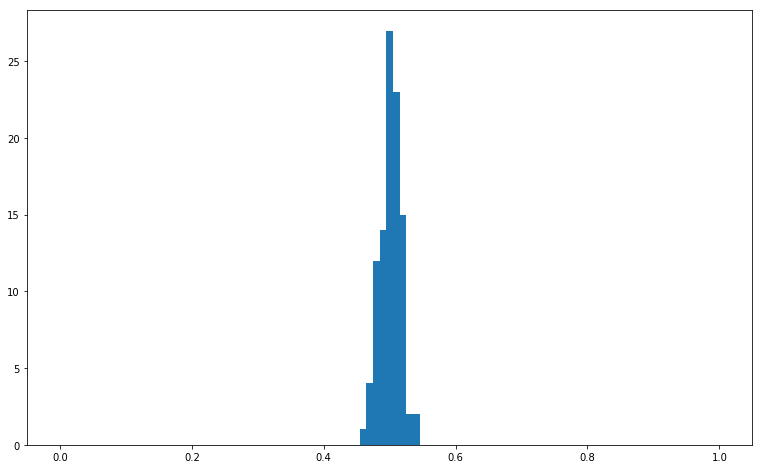

In [16]:
N = 1000
N_trials = 100
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

Mean  [0.49 0.51 0.52 0.52 0.47 0.53 0.51 0.55 0.44 0.53 0.47 0.54 0.5  0.49
 0.52 0.6  0.58 0.5  0.51 0.51 0.44 0.5  0.44 0.49 0.47 0.43 0.53 0.47
 0.5  0.45 0.52 0.44 0.45 0.49 0.48 0.55 0.45 0.58 0.51 0.58 0.56 0.61
 0.58 0.46 0.53 0.55 0.45 0.53 0.51 0.47 0.44 0.45 0.51 0.42 0.44 0.61
 0.48 0.4  0.54 0.55 0.42 0.42 0.51 0.49 0.54 0.52 0.5  0.46 0.43 0.45
 0.5  0.45 0.53 0.48 0.49 0.48 0.51 0.53 0.46 0.47 0.46 0.45 0.56 0.49
 0.45 0.51 0.55 0.47 0.53 0.58 0.54 0.48 0.57 0.49 0.48 0.48 0.45 0.53
 0.46 0.38 0.52 0.47 0.48 0.5  0.5  0.43 0.45 0.48 0.51 0.48 0.45 0.41
 0.43 0.48 0.55 0.45 0.54 0.45 0.35 0.56 0.5  0.61 0.61 0.57 0.46 0.55
 0.49 0.57 0.54 0.52 0.5  0.52 0.56 0.49 0.51 0.5  0.49 0.59 0.56 0.47
 0.49 0.54 0.52 0.49 0.42 0.45 0.5  0.48 0.5  0.49 0.42 0.52 0.51 0.46
 0.49 0.46 0.57 0.49 0.53 0.47 0.53 0.51 0.57 0.53 0.47 0.52 0.52 0.39
 0.5  0.51 0.47 0.49 0.42 0.58 0.52 0.54 0.43 0.41 0.57 0.44 0.55 0.5
 0.49 0.58 0.46 0.55 0.49 0.44 0.36 0.52 0.45 0.44 0.44 0.4  0.58 0.56
 

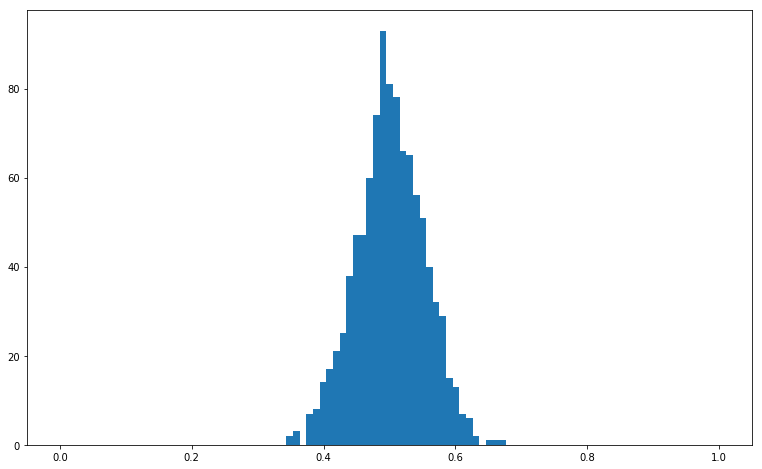

In [17]:
N = 100
N_trials = 1000
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

Mean  [0.5026 0.4995 0.4993 0.5032 0.4975 0.5013 0.5073 0.4982 0.4968 0.5067] , std  0.0034923344627913297


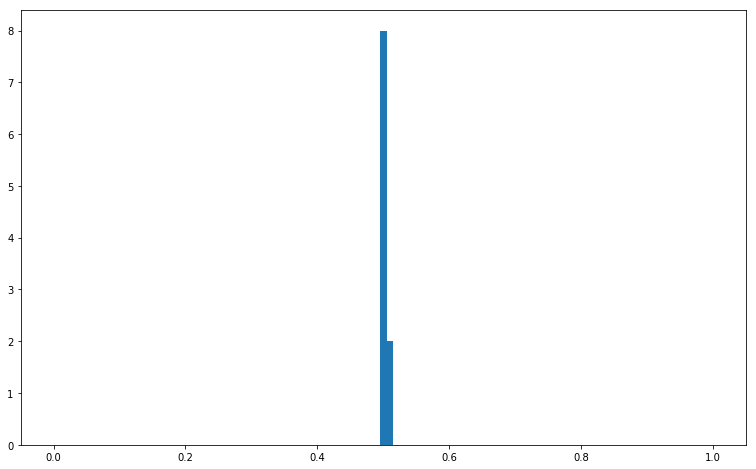

In [18]:
N = 10000
N_trials = 10
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

Mean  [0.3 0.5 0.5 ... 0.4 0.6 0.8] , std  0.15860277141336465


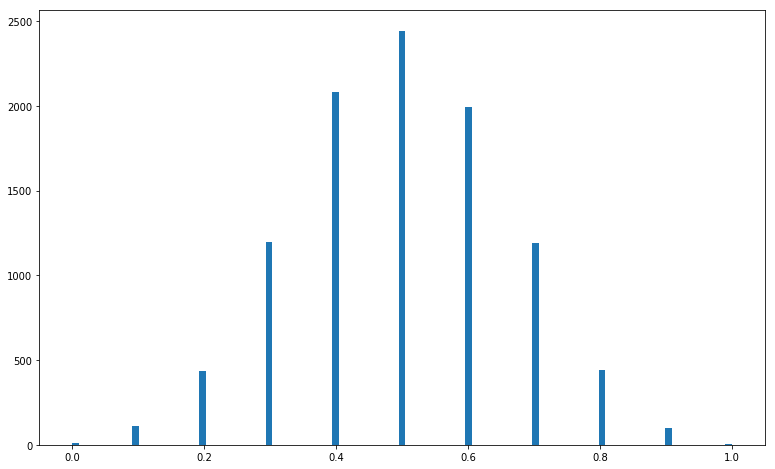

In [19]:
N = 10
N_trials = 10000
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

## introducing the normal variable: the Gaussian distribution

Mean  [0.5037 0.5168 0.5043 ... 0.5018 0.5036 0.5034] , std  0.0049776245637351965


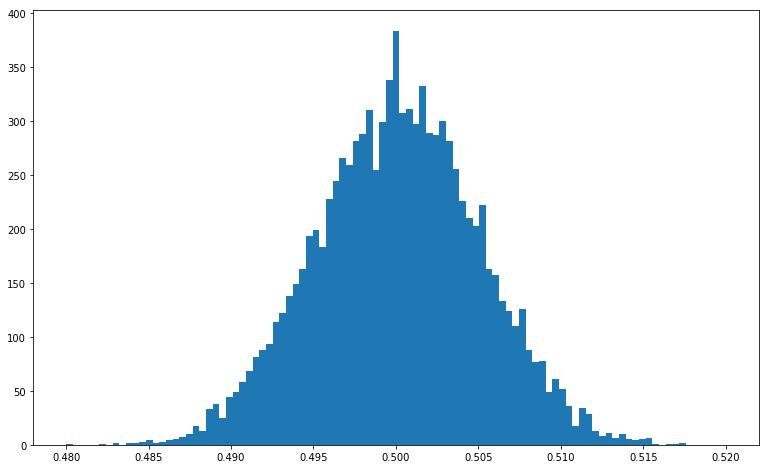

In [20]:
N = 10000
N_trials = 10000
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0.48, .52, 100));

Central limit theorem:

Over multiple measurements, the average of an identical random variable converges to a normal law :
$$
p (x) = \frac {1} { \sqrt{ 2\pi } \sigma} \cdot \exp{(- \frac {1} {2} \cdot \frac {(x - m)^2} {\sigma^2} )}
$$

(moreover, we know from this theorem that the asymptotic mean is the mean or the rv and that the variance decreases inversely proportionally with the number of measurements)

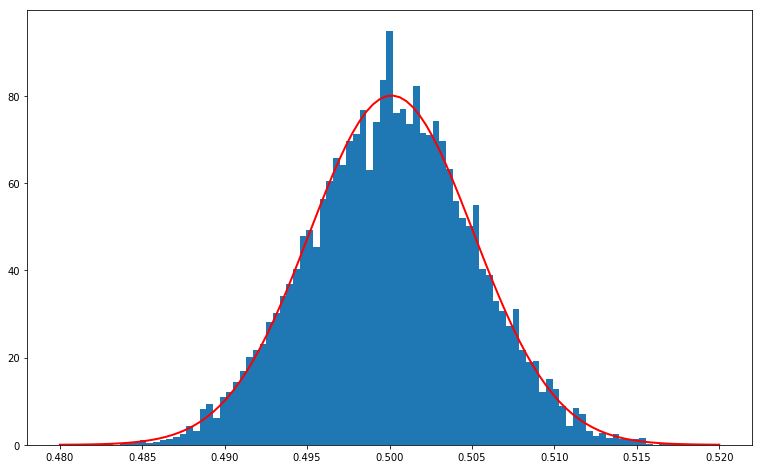

In [21]:
mean  = result.mean(axis=0).mean()
std  = result.mean(axis=0).std()
bins = np.linspace(0.48, .52, 100)

fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=bins, density=True)
ax.plot(bins, 1 / np.sqrt(2*np.pi) / std * np.exp(-.5*(bins-mean)**2/std**2), 'r', lw=2 );

The central limit theorem works with all forms of random variables:

In [22]:
N = 10000
N_trials = 1000
result = np.random.rand(N, N_trials)
print(result)

[[0.17776032 0.70153493 0.51930643 ... 0.35664146 0.05377125 0.99831716]
 [0.47969204 0.05427134 0.87522712 ... 0.0897827  0.83370048 0.20273843]
 [0.8052115  0.62939528 0.12933345 ... 0.31730851 0.62459905 0.56850112]
 ...
 [0.93144067 0.63063853 0.33191078 ... 0.28888445 0.93512079 0.6656451 ]
 [0.84540231 0.89137123 0.72865125 ... 0.29466667 0.29699345 0.5264605 ]
 [0.29392923 0.51797084 0.41350589 ... 0.30197422 0.91424485 0.94056245]]


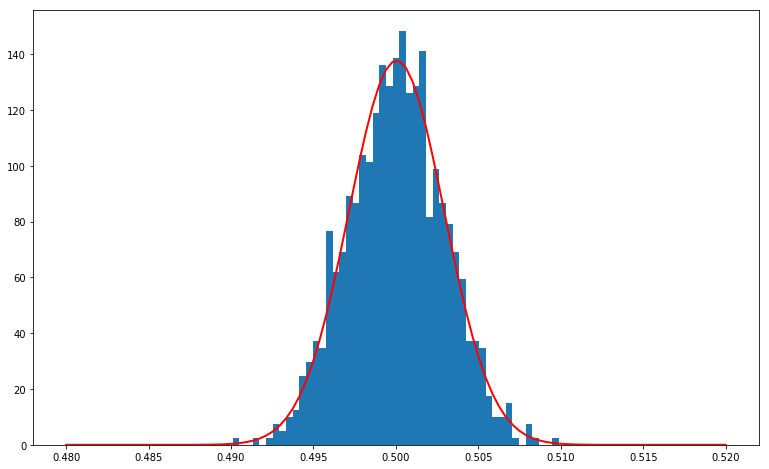

In [23]:
mean  = result.mean(axis=0).mean()
std  = result.mean(axis=0).std()
bins = np.linspace(0.48, .52, 100)

fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=bins, density=True)
ax.plot(bins, 1 / np.sqrt(2*np.pi) / std * np.exp(-.5*(bins-mean)**2/std**2), 'r', lw=2 );

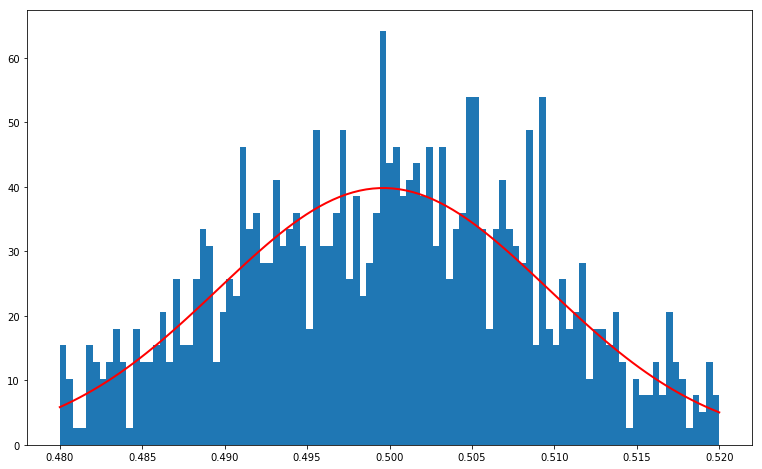

In [24]:
N = 10000
N_trials = 1000
result = np.random.randn(N, N_trials) + .5

mean  = result.mean(axis=0).mean()
std  = result.mean(axis=0).std()
bins = np.linspace(0.48, .52, 100)

fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=bins, density=True)
ax.plot(bins, 1 / np.sqrt(2*np.pi) / std * np.exp(-.5*(bins-mean)**2/std**2), 'r', lw=2 );